In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip


--2021-07-11 07:42:20--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  13.8MB/s    in 22s     

2021-07-11 07:42:43 (13.8 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
!pip install split-folders

# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

import splitfolders
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', 
                    output='/tmp/rockpaperscissors/split_result',
                    seed=1337,
                    ratio=(.6, .4)) #bagi data training dan validasi dengan split folders (60% / 40%)

base_dir = '/tmp/rockpaperscissors/split_result'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

import os
os.listdir(validation_dir)

Copying files: 2188 files [00:00, 3216.98 files/s]


['rock', 'paper', 'scissors']

In [ ]:
# membuat direktori rock pada direktori data training
rock_dir = os.path.join(train_dir, 'rock')
 
# membuat direktori paper pada direktori data training
paper_dir = os.path.join(train_dir, 'paper')
 
# membuat direktori scissors pada direktori data training
scissors_dir = os.path.join(train_dir, 'scissors')

# membuat direktori rock pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')
 
# membuat direktori paper berantakan pada direktori data validasi
validation_paper_dir = os.path.join(validation_dir, 'paper')
 
# membuat direktori scissors berantakan pada direktori data validasi
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        class_mode='categorical')# karena kita merupakan masalah klasifikasi lebih dari 2 kelas maka menggunakan class_mode = 'categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), 
        batch_size=4, 
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') #activation softmax untuk multi class classification
])

In [ ]:
# compile model dengan 'Adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    print(logs.get('accuracy'))
    if(logs.get('accuracy') > 0.9):
      print("\nHoree, Akurasi telah mencapai > 90%, Pelatihan akan di berhentikan!")
      self.model.stop_training = True
callbacks = myCallback()

In [44]:
# latih model dengan model.fit 
hist = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks=[callbacks]) #fungsi yang akan di panggil jika akurasi telah mencapai lebih dari 90%)

Epoch 1/20
25/25 - 7s - loss: 0.3184 - accuracy: 0.8800 - val_loss: 0.2645 - val_accuracy: 0.9000
0.8799999952316284
Epoch 2/20
25/25 - 6s - loss: 0.2710 - accuracy: 0.8600 - val_loss: 0.1285 - val_accuracy: 1.0000
0.8600000143051147
Epoch 3/20
25/25 - 6s - loss: 0.2354 - accuracy: 0.9300 - val_loss: 0.5287 - val_accuracy: 0.9000
0.9300000071525574

Horee, Akurasi telah mencapai > 90%, Pelatihan akan di berhentikan!


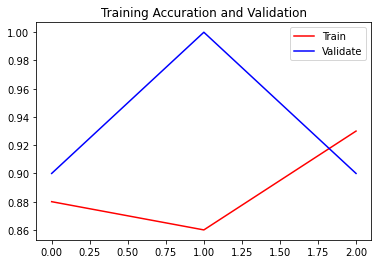

<Figure size 432x288 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Train')
plt.plot(epochs, val_acc, 'b', label='Validate')
plt.title('Training Accuration and Validation')
plt.legend(loc=0)
plt.figure()


plt.show()

Saving rock3.png to rock3 (1).png
rock3.png
rock
[[0. 1. 0.]]


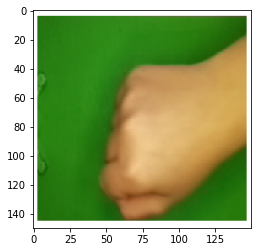

In [48]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  

  print(fn)
  if classes[0][0]==1:
    print('paper') 
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  
  print(classes)